In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("Adidas_sales_datasets.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [2]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.describe()

,Unnamed: 0,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,0.0,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,NaN,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,NaN,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,NaN,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,NaN,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,NaN,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,NaN,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,NaN,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# What is the total revenue generated by each product category (e.g., Men's Street Footwear, Women's Apparel)? 
## Insight: Identify top-performing product categories and focus on marketing or restocking them.

Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64


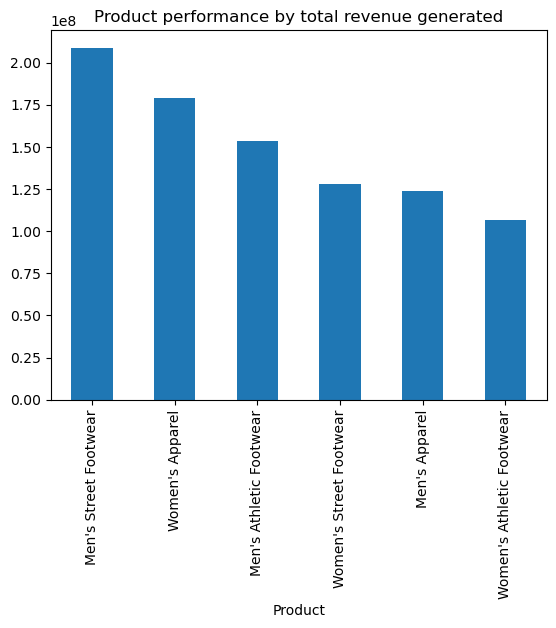

In [4]:
print(df.groupby("Product")["Total Sales"].sum().sort_values(ascending= False))
df.groupby("Product")["Total Sales"].sum().sort_values(ascending= False).plot(kind="bar")
plt.title("Product performance by total revenue generated")
plt.show()

# Which sales method (In-store vs. Outlet) generates the highest revenue across all products? 
## Insight: Allocate resources to the most profitable sales channels.

<Axes: title={'center': 'Total revenue by Sales Method'}, xlabel='Sales Method'>

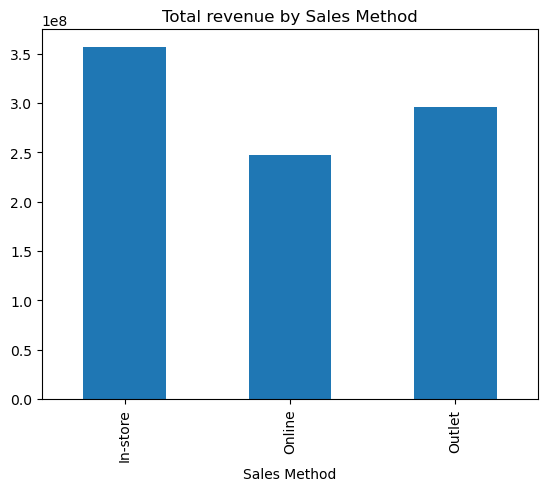

In [5]:
df.groupby("Sales Method")["Total Sales"].sum().plot(kind="bar", title="Total revenue by Sales Method")

# What is the average operating margin across all product categories? 
## Insight: Pinpoint categories with low margins and explore cost-reduction strategies.

<Axes: xlabel='Product'>

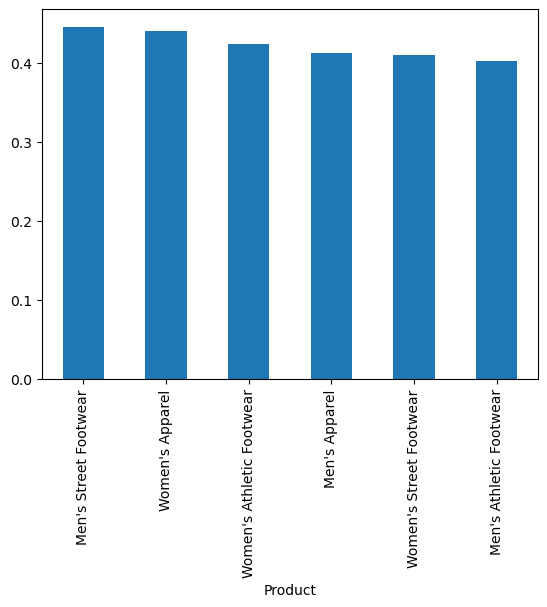

In [6]:
df.groupby("Product")["Operating Margin"].mean().sort_values(ascending=False).plot(kind="bar")

# How does the total revenue change across different weeks or months? 
## Insight: Identify seasonal trends or periods of high demand.

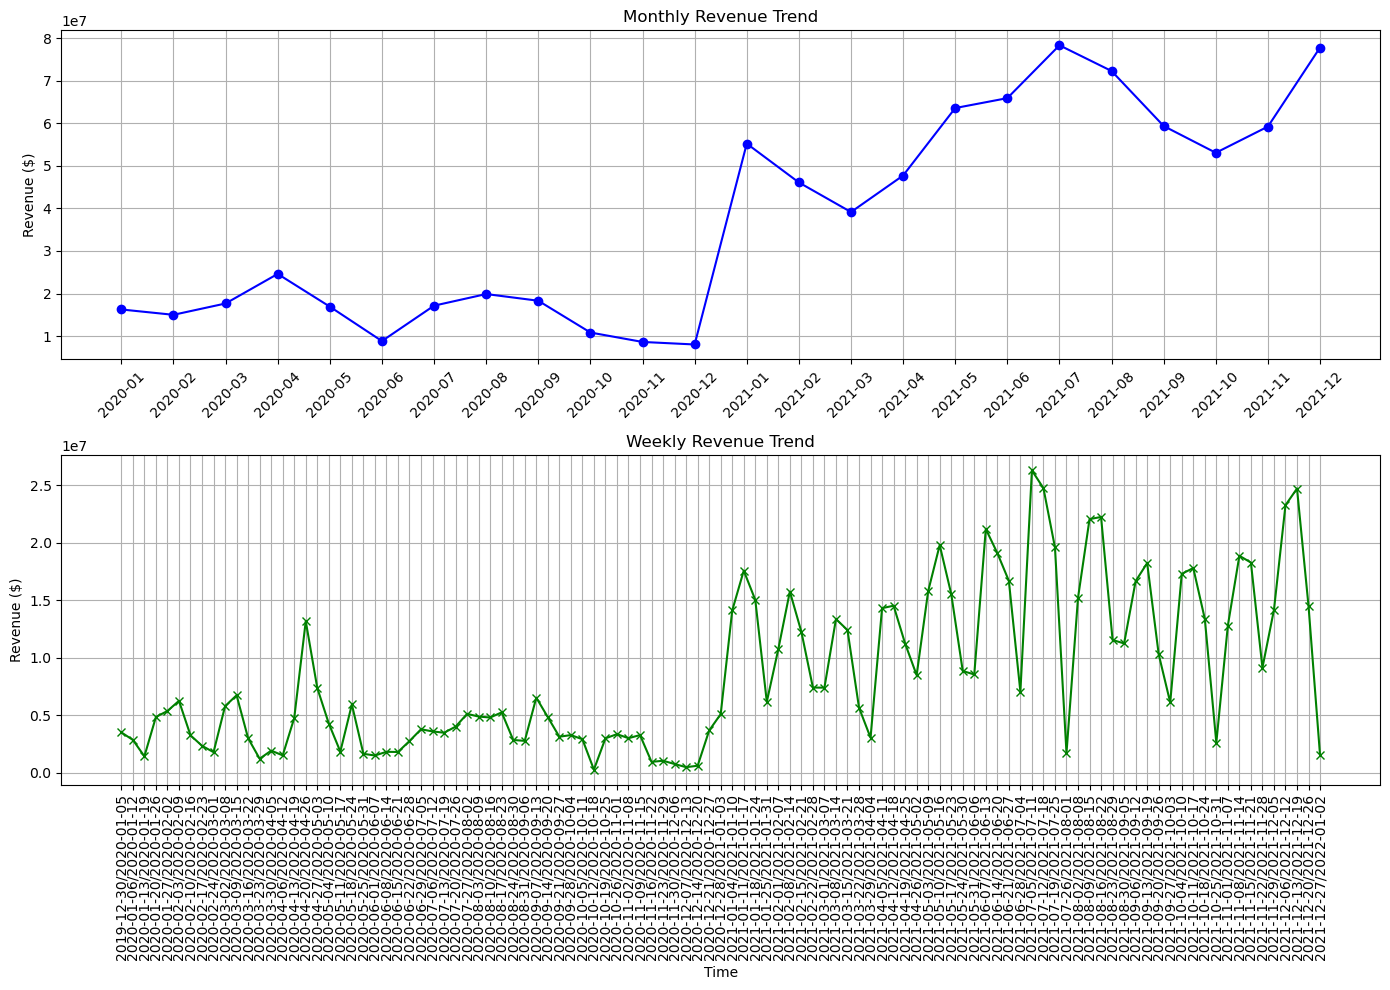

In [7]:
df['order_month'] = df["Invoice Date"].dt.to_period('M') 
df['order_week'] = df["Invoice Date"].dt.to_period('W')
monthly_revenue = df.groupby("order_month")["Total Sales"].sum().reset_index()
monthly_revenue["order_month"] = monthly_revenue["order_month"].astype(str)
weekly_revenue = df.groupby("order_week")["Total Sales"].sum().reset_index()
weekly_revenue["order_week"] = weekly_revenue["order_week"].astype(str)
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=False)
axes[0].plot(monthly_revenue["order_month"], monthly_revenue["Total Sales"], color="blue", marker='o')
axes[0].set_title("Monthly Revenue Trend")
axes[0].set_ylabel("Revenue ($)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[1].plot(weekly_revenue["order_week"], weekly_revenue["Total Sales"], color="green", marker='x')
axes[1].set_title("Weekly Revenue Trend")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Revenue ($)")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True)
plt.tight_layout()
plt.show() 

# Which region contributes the most to the total sales, and does it align with the highest profitability? 
## Insight: Evaluate regional strategies to maximize profitability. 

In [8]:
Top_sales_region  = df.groupby("Region")["Total Sales"].sum().sort_values(ascending = False)
Top_profit_margin = df.groupby("Region")["Operating Margin"].sum().sort_values(ascending = False)
Top_sales_region = Top_sales_region.idxmax()
Top_profit_margin = Top_profit_margin.idxmax()
if Top_sales_region ==  Top_profit_margin:
    print (f"The region that contributed the most to the total sales is {Top_sales_region} and aligns with the highest profitability which is {Top_profit_margin}")
else:
     print (f"The region that contributed the most to the total sales is {Top_sales_region} and does not aligns with the highest profitability which is {Top_profit_margin}")


The region that contributed the most to the total sales is West and does not aligns with the highest profitability which is Northeast


In [9]:
df["Week"] = df["Invoice Date"].dt.isocalendar().week
df["Year"] = df["Invoice Date"].dt.year
df["Year-Week"] = df["Year"].astype(str) + "-W" + df["Week"].astype(str)
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,order_month,order_week,Week,Year,Year-Week
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020-01,2019-12-30/2020-01-05,1,2020,2020-W1
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020-01,2019-12-30/2020-01-05,1,2020,2020-W1
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020-01,2019-12-30/2020-01-05,1,2020,2020-W1
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020-01,2019-12-30/2020-01-05,1,2020,2020-W1
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020-01,2019-12-30/2020-01-05,1,2020,2020-W1


# Are there specific dates or weeks when certain products experienced a significant spike or drop in sales?
## Insight: Investigate external factors, promotions, or events influencing these trends.

Men's Apparel


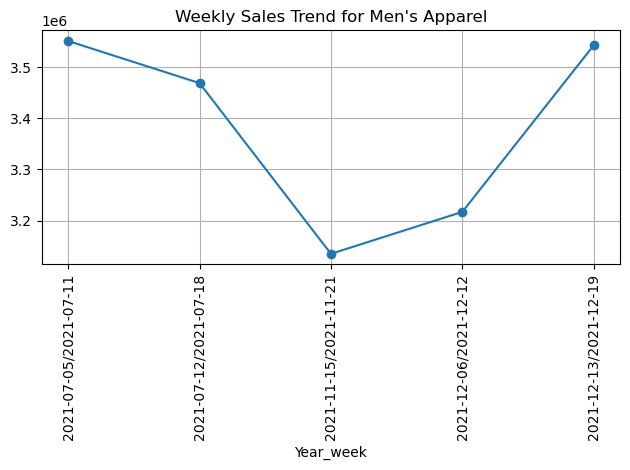

In [10]:
weekly_product_sales = df.groupby(["Product", "order_week"])["Total Sales"].sum().reset_index()
product_stats = weekly_product_sales.groupby("Product")["Total Sales"].agg(["mean", "std"]).reset_index()
weekly_product_sales = weekly_product_sales.merge(product_stats, on="Product")
weekly_product_sales["Anomaly"] = weekly_product_sales.apply(
    lambda row: "Spike" if row["Total Sales"] > row["mean"] + 2*row["std"]
    else "Drop" if row["Total Sales"] < row["mean"] - 2*row["std"]
    else "Normal", axis=1
)

spikes = weekly_product_sales[weekly_product_sales["Anomaly"] == "Spike"]
#spikes_and_drops = weekly_product_sales[weekly_product_sales["Anomaly"] != "Normal"]
Products = spikes["Product"].unique().tolist()
print(Products[0])
## This is visualization for Spike in sales for men's wear
data = spikes[spikes["Product"] == "Men's Apparel"]
x_values = list(range(len(data["order_week"])))
plt.plot(x_values, data["Total Sales"], marker='o')
plt.title(f"Weekly Sales Trend for Men's Apparel")
plt.xlabel("Year_week")
plt.xticks(range(len(data["order_week"])), data["order_week"], rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('Spike_sales_anomalies_for_Mens Apparel_png', dpi=300, bbox_inches='tight')

# This is visualization for spikes in total sales for all products, the chart is long but if you want to view it
# just remove the comment and comment out the above code 

#fig, axes = plt.subplots(len(Products), 1, figsize=(18,15*len(Products)))
#for i, product in enumerate(Products):
    #data = spikes[spikes["Product"] == product]
    #x_values = list(range(len(data["order_week"])))
    #axes[i].plot(x_values, data["Total Sales"], marker='o')
    #axes[i].set_title(f"Weekly Sales Trend for {product}")
    #axes[i].set_xticks(range(len(data["order_week"])))
    #axes[i].set_xticklabels(data["order_week"], rotation=90)
    #axes[i].grid(True)
#plt.tight_layout()
#plt.show()
#fig.savefig('sales_anomalies.png', dpi=300, bbox_inches='tight')



## This is visualization for Drop in sales for certain product for some dates/week, 
# and unfornately there are no drop in sales, so the table/chart are empty, so i commented it out

#Drop = weekly_product_sales[weekly_product_sales["Anomaly"] == "Drop"]
#spikes_and_drops = weekly_product_sales[weekly_product_sales["Anomaly"] != "Normal"]
#Products = Drop["Product"].unique().tolist()
#fig, axes = plt.subplots(len(Products), 1, figsize=(18,15*len(Products)))
#for i, product in enumerate(Products):
    #data = Drop[Drop["Product"] == product]
    #x_values = list(range(len(Drop["order_week"]))) 
    #axes[i].plot(x_values, Drop["Total Sales"], marker='o')
    #axes[i].set_title(f"Weekly Sales Trend for {product}")
    #axes[i].set_xticks(range(len(Drop["order_week"])))
    #axes[i].set_xticklabels(Drop["order_week"], rotation=90)
    #axes[i].grid(True)
#plt.tight_layout()
#plt.show()

# Which product category has the highest operating profit across both sales methods? 
 ## Insight: Prioritize high-profit items in marketing and distribution.

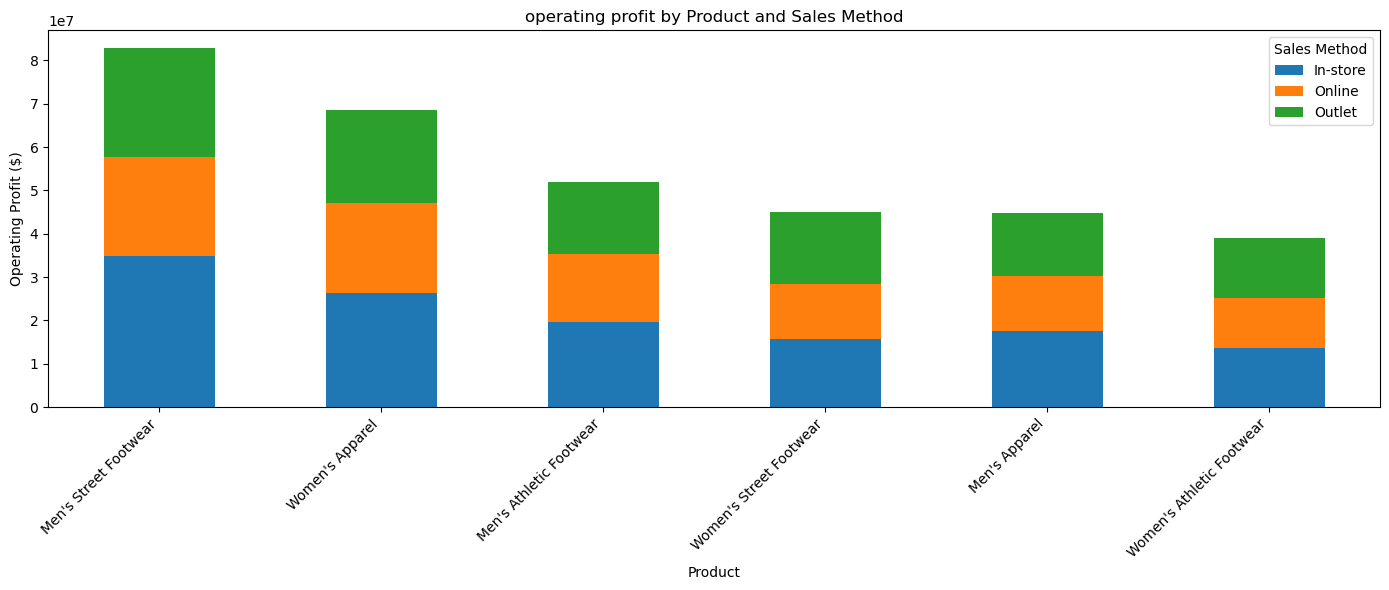

Sales Method,In-store,Online,Outlet,Total Profit
Product,,,,
Men's Street Footwear,34867100.0,22958021.76,24977138.86,82802260.62
Women's Apparel,26285125.0,20843599.33,21522246.23,68650970.56
Men's Athletic Footwear,19702375.0,15674177.79,16470335.40,51846888.19
Women's Street Footwear,15693562.5,12711310.75,16690953.56,45095826.81
Men's Apparel,17474500.0,12827852.21,14460678.12,44763030.33
Women's Athletic Footwear,13568625.0,11540214.63,13866945.31,38975784.94


In [11]:
highest_op_product= df.groupby(["Product", "Sales Method"])["Operating Profit"].sum().unstack().fillna(0)
highest_op_product["Total Profit"]= highest_op_product.sum(axis=1)
highest_op_product = highest_op_product.sort_values("Total Profit", ascending=False)
highest_op_product.drop("Total Profit", axis=1).plot(kind="bar", stacked= True, figsize=(14,6))
plt.title("operating profit by Product and Sales Method")
plt.ylabel("Operating Profit ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
highest_op_product


# What is the average profit margin for products sold via In-store vs. Outlet methods? 
## Insight: Assess the efficiency and profitability of each channel. 

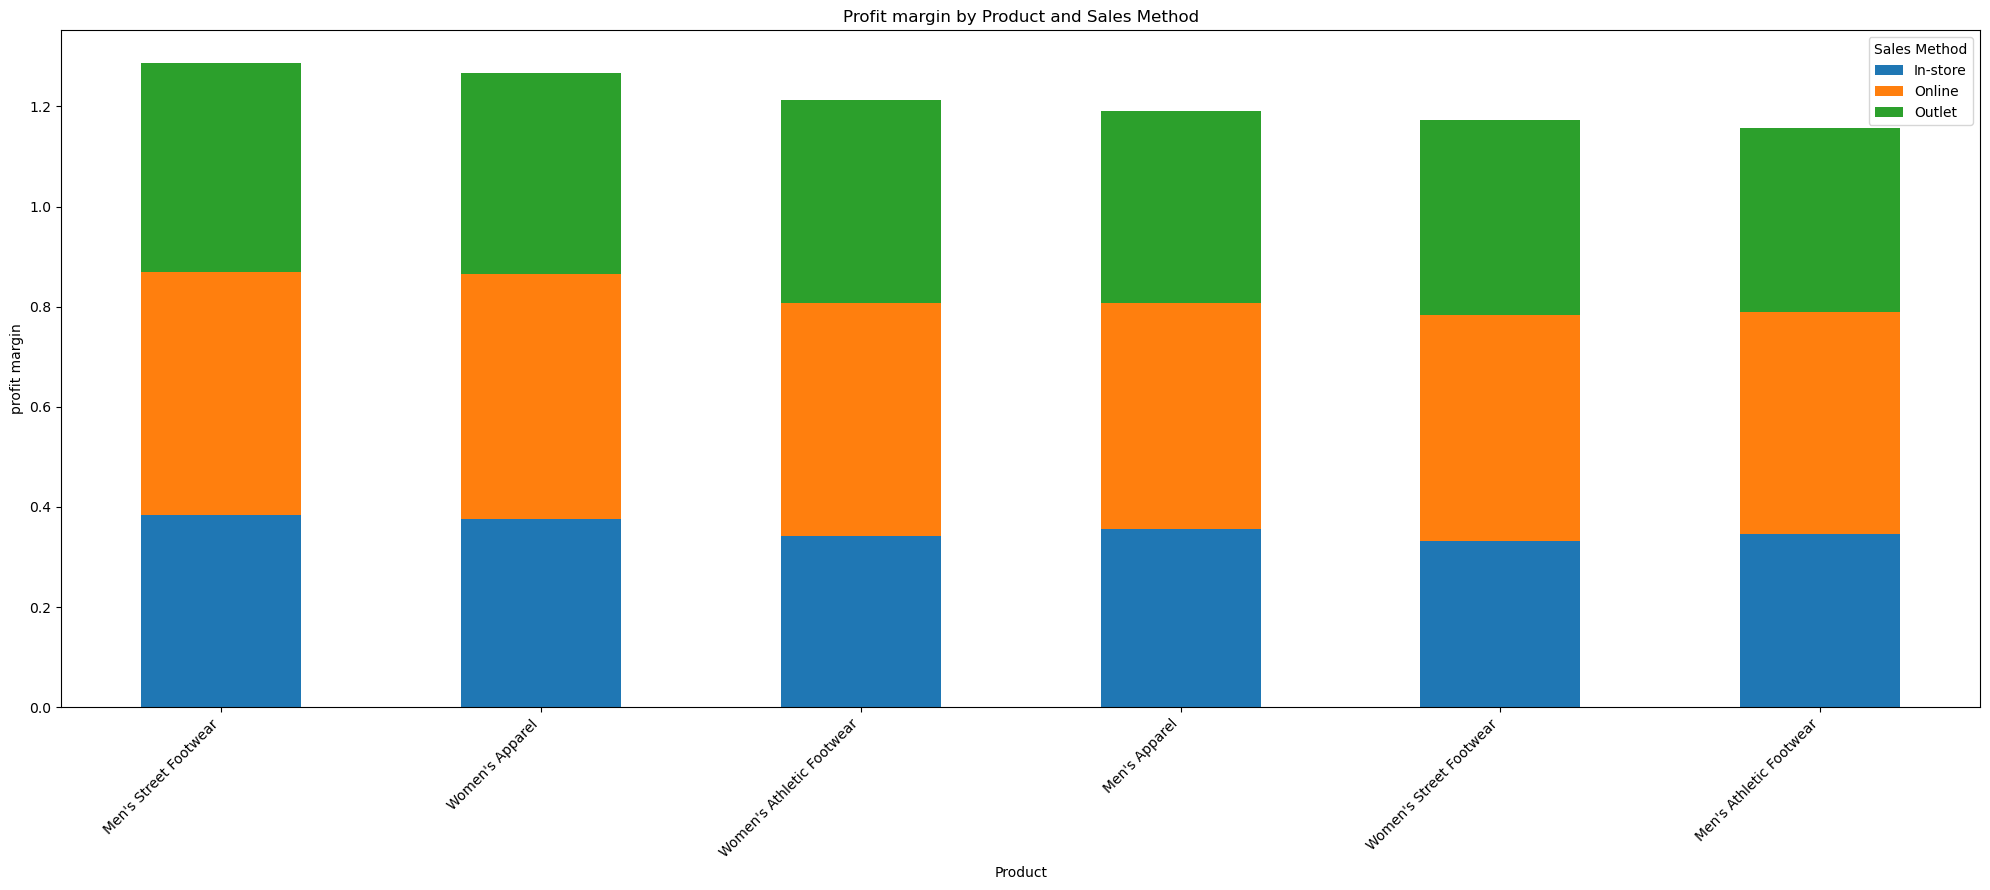

In [18]:
ave_profit_marg = df.groupby(["Product", "Sales Method"])["Operating Margin"].mean().unstack().fillna(0)
ave_profit_marg["ave_marg"] = ave_profit_marg.sum(axis = 1)
ave_profit_marg = ave_profit_marg.sort_values("ave_marg", ascending = False)
ave_profit_marg.drop("ave_marg", axis=1).plot(kind="bar", stacked= True, figsize=(20,9))
plt.title("Profit margin by Product and Sales Method")
plt.ylabel("profit margin")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Which product had the lowest operating margin, and how can this be improved? 
## Insight: Optimize pricing, reduce costs, or discontinue low-margin products. 


In [32]:
ave_profit_marg = df.groupby(["Product", "Sales Method"])["Operating Margin"].mean().unstack().fillna(0)
ave_profit_marg["ave_marg"] = ave_profit_marg.sum(axis = 1)
ave_profit_marg = ave_profit_marg.sort_values("ave_marg", ascending = False)
#ave_profit_marg = ave_profit_marg.reset_index()
ave_profit_marg = ave_profit_marg[["ave_marg"]]
pro_lowest_marg = ave_profit_marg["ave_marg"].idxmin()
pro_lowest_marg
#pro_lowest_marg = ave_profit_marg.loc[min_index]
#pro_lowest_marg

"Men's Athletic Footwear"

 # What is the total revenue generated from each product in the Men's Footwear category? 
## Insight: Determine which specific items drive success in this category. 

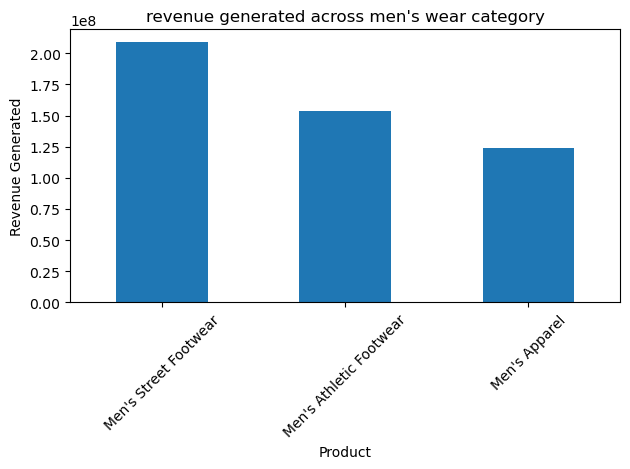

In [39]:
mens_footwear = df[df["Product"].str.contains("Men's")]
mens_footwear = mens_footwear.groupby("Product")["Total Sales"].sum().sort_values(ascending = False)
mens_footwear.plot(kind="bar", title = "revenue generated across men's wear category")
plt.ylabel("Revenue Generated")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


# How does the performance of Women's Athletic Footwear compare to Women's Street Footwear in terms of sales and profit? 
## Insight: Adjust marketing and inventory allocation between these products.

In [53]:
filtered = df[df["Product"].isin(["Women's Athletic Footwear", "Women's Street Footwear"])]
filtered = filtered.groupby("Product")[["Total Sales", "Operating Profit", "Operating Margin"]].agg({"Total Sales": "sum", "Operating Profit": "sum", "Operating Margin": "mean"}).reset_index()
filtered

,Product,Total Sales,Operating Profit,Operating Margin
0,Women's Athletic Footwear,106631896.0,38975784.94,0.424359
1,Women's Street Footwear,128002813.0,45095826.81,0.410199


# What is the average units sold per day for each product category? 
## Insight: Predict inventory needs and avoid stockouts or overstock.

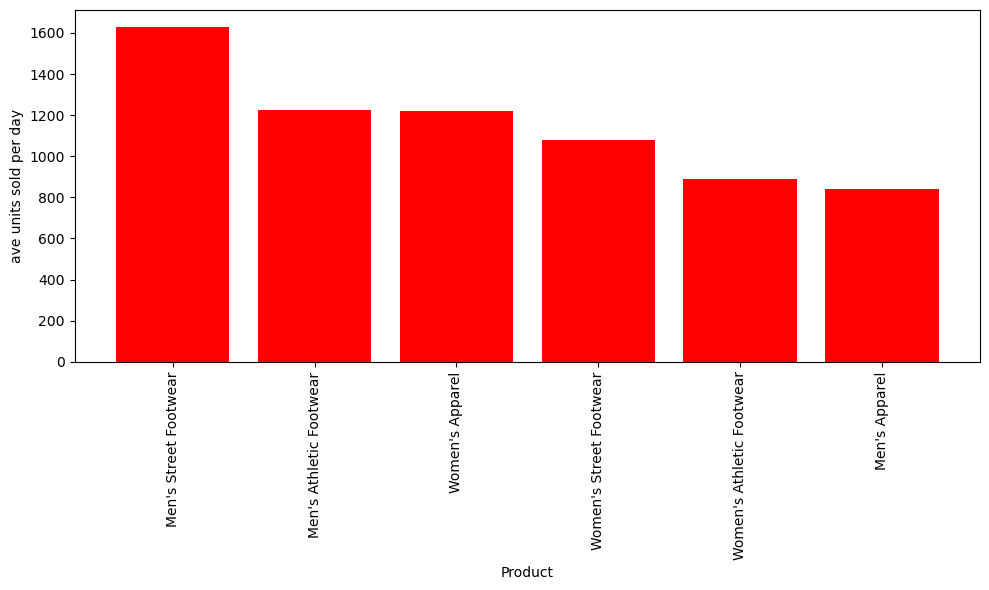

In [87]:
filtered = df.groupby(["Invoice Date", "Product"])["Units Sold"].sum().reset_index()
ave_sold_perday = filtered.groupby("Product")["Units Sold"].mean().reset_index()
ave_sold_perday = ave_sold_perday.rename(columns={"Units Sold": "Average Units Sold per day"})
ave_sold_perday =ave_sold_perday.sort_values(by = "Average Units Sold per day", ascending = False)
plt.figure(figsize = (10, 6))
plt.bar(ave_sold_perday["Product"], ave_sold_perday["Average Units Sold per day"], color = "red")
#plt.title("adam")
plt.ylabel("ave units sold per day")
plt.xlabel("Product")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()